In [ ]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
from sklearn.metrics import accuracy_score

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import time

In [ ]:
(x_tr, y_tr), (x_te, y_te) = mnist.load_data()
x_tr.shape

(60000, 28, 28)

In [ ]:
x_te.shape

(10000, 28, 28)

In [ ]:
y_tr.shape

(60000,)

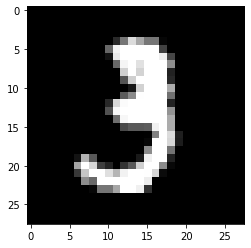

In [ ]:
plt.imshow(x_tr[10,:,:], cmap='gray')

In [ ]:
y_tr[10]

3

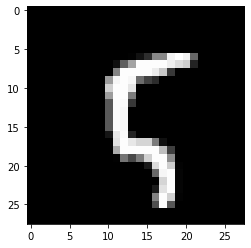

In [ ]:
plt.imshow(x_tr[100], cmap='gray')

In [ ]:
y_tr[100]

5

In [ ]:
sh = x_tr.shape
x_train = x_tr.reshape(sh[0], sh[1], sh[2], 1)
x_train.shape

(60000, 28, 28, 1)

In [ ]:
sh = x_te.shape
x_test = x_te.reshape(sh[0], sh[1], sh[2], 1)
x_test.shape

(10000, 28, 28, 1)

In [ ]:
numb_classes = 10
y_train_enc = np_utils.to_categorical(y_tr, numb_classes)
y_test_enc = np_utils.to_categorical(y_te, numb_classes)

In [ ]:
y_train_enc[100]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
y_train_enc[10]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
model = Sequential()
model.add(
    #padding = 'valid' --> no padding
    Conv2D(25, kernel_size=(3,3), strides= (1,1),padding='valid', activation='relu', input_shape=(28,28,1))
)
model.add(
    MaxPool2D(pool_size=(2,2))
)
model.add(
    Flatten()
)
model.add(
    Dense(100, activation='relu')
)
model.add(
    Dense(10, activation='softmax')
)

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.fit(x_train, y_train_enc, batch_size=128, epochs=5, validation_data=(x_test, y_test_enc))

Epoch 1/5
469/469 [==============================] - 7s 8ms/step - loss: 1.0284 - accuracy: 0.9023 - val_loss: 0.1584 - val_accuracy: 0.9613
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1101 - accuracy: 0.9704 - val_loss: 0.1086 - val_accuracy: 0.9713
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0634 - accuracy: 0.9822 - val_loss: 0.1051 - val_accuracy: 0.9742
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0438 - accuracy: 0.9869 - val_loss: 0.0953 - val_accuracy: 0.9794
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0290 - accuracy: 0.9907 - val_loss: 0.0895 - val_accuracy: 0.9797


In [ ]:
pred_y = model.predict(x_test)
import numpy as np
max_loc = np.argmax(pred_y[100])

In [ ]:
max_loc

6

6


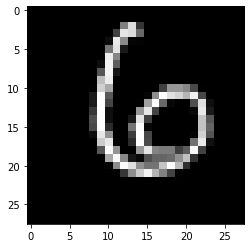

In [ ]:
print(y_te[100])
plt.imshow(x_te[100], cmap='gray')

7
[3.3828940e-12 5.7127455e-15 1.6425048e-08 2.7353619e-06 1.4799932e-15
 2.6157382e-20 8.3584311e-12 9.9999726e-01 2.2678965e-11 3.4685679e-10]


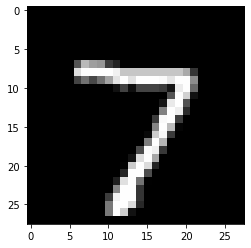

In [ ]:
print(y_te[0])
print(pred_y[0])
plt.imshow(x_te[0], cmap='gray')

Conclusion:

CNN is generated for the given mnist dataset of 10 digits, CNN has input layer, 2 hidden layers and 1 output layer with 10 neurons, the network is trained using adam optimizer and 5 epochs. It shows validation accuracy as 97.94%. The network is tested for 0th and 100th sample which are accurately predicted. 

Part 2


In [ ]:
from keras.datasets import cifar10

In [ ]:
(x_tr, y_tr), (x_te, y_te) = cifar10.load_data()
x_tr.shape

(50000, 32, 32, 3)

In [ ]:
x_te.shape

(10000, 32, 32, 3)

In [ ]:
y_tr[0, :]

array([6], dtype=uint8)

In [ ]:
y_tr.shape

(50000, 1)

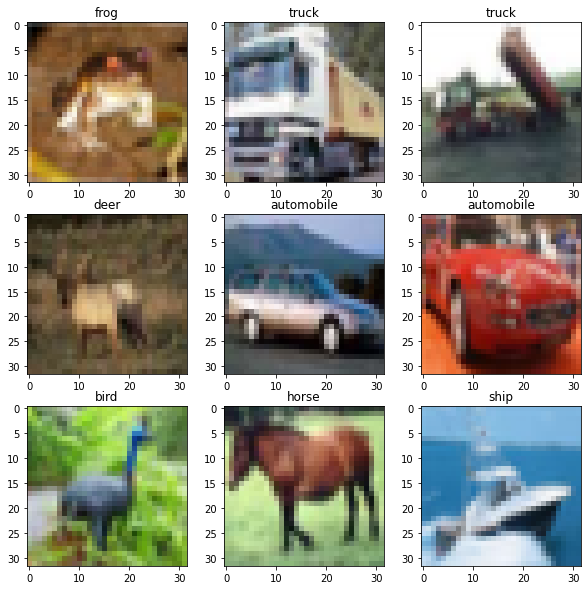

In [ ]:
class_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_tr[i])
  plt.title(class_name[y_tr[i][0]])

In [ ]:
numb_classes = 10
y_train_enc = np_utils.to_categorical(y_tr, numb_classes)
y_test_enc = np_utils.to_categorical(y_te, numb_classes)

In [ ]:
model = Sequential()
model.add(
    #padding = 'same' --> add padding such that size after conv2d remains same
    Conv2D(50, kernel_size=(3,3), strides= (1,1),padding='same', activation='relu', input_shape=(32,32,3))
)
model.add(
    MaxPool2D(pool_size=(2,2))
)
model.add(
    #padding = 'same' --> add padding such that size after conv2d remains same
    Conv2D(75, kernel_size=(3,3), strides= (1,1),padding='same', activation='relu')
)
model.add(
    MaxPool2D(pool_size=(2,2))
)
model.add(
    Dropout(0.25)
)
model.add(
    #padding = 'same' --> add padding such that size after conv2d remains same
    Conv2D(125, kernel_size=(3,3), strides= (1,1),padding='same', activation='relu')
)
model.add(
    MaxPool2D(pool_size=(2,2))
)
model.add(
    Dropout(0.25)
)
model.add(
    Flatten()
)
model.add(
    Dense(500, activation='relu')
)
model.add(
    Dropout(0.4)
)
model.add(
    Dense(250, activation='relu')
)
model.add(
    Dropout(0.3)
)
model.add(
    Dense(10, activation='softmax')
)

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.fit(x_tr, y_train_enc, batch_size=128, epochs=5, validation_data=(x_te, y_test_enc))

Epoch 1/5
391/391 [==============================] - 5s 12ms/step - loss: 2.4301 - accuracy: 0.2882 - val_loss: 1.5977 - val_accuracy: 0.4468
Epoch 2/5
391/391 [==============================] - 5s 12ms/step - loss: 1.5727 - accuracy: 0.4259 - val_loss: 1.3253 - val_accuracy: 0.5290
Epoch 3/5
391/391 [==============================] - 6s 14ms/step - loss: 1.4144 - accuracy: 0.4917 - val_loss: 1.2276 - val_accuracy: 0.5780
Epoch 4/5
391/391 [==============================] - 5s 13ms/step - loss: 1.3009 - accuracy: 0.5398 - val_loss: 1.1254 - val_accuracy: 0.6111
Epoch 5/5
391/391 [==============================] - 4s 10ms/step - loss: 1.2136 - accuracy: 0.5740 - val_loss: 1.1023 - val_accuracy: 0.6306


airplane


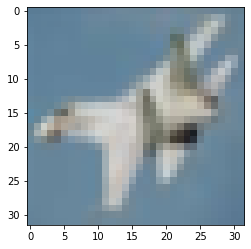

In [ ]:
predict = model.predict(x_te)
predict[10]
ind_x = np.argmax(predict[10])
class_name[ind_x]
y_te[10]
ind_y = np.argmax(y_te[10])
print(class_name[ind_y])
plt.imshow(x_te[10])


Conclusion:

Cifar 10 is used to train convolution train network with 3 convolutional layer and 3 fully connected layers to classify 10 categories of given images. For 10th test image the network predicts airplane and actual sample image is airplane. Since accuracy of the network is 63.06%, the prediction of few samples can be wrong.